# This notebook uses Keras Functional API's to predict Mercedes Kaggle challenge

### Include necesary Imports

In [10]:
from keras.models import Model
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

### Read  the csv and preprocess the data

In [8]:
merc_train_FILE = "/Users/tkmacl9/Desktop/Kaggle_Competitions/Mercedes_regression/train.csv"
merc_test_FILE = "/Users/tkmacl9/Desktop/Kaggle_Competitions/Mercedes_regression/test.csv"

merc_train = pd.read_csv(merc_train_FILE, delimiter=",", header=0)
merc_test = pd.read_csv(merc_test_FILE, delimiter=",", header=0)


del merc_train['ID']
del merc_train['X0']
del merc_train['X1']
del merc_train['X2']
del merc_train['X3']
del merc_train['X4']
del merc_train['X5']
del merc_train['X6']
del merc_train['X8']

del merc_test['ID']
del merc_test['X0']
del merc_test['X1']
del merc_test['X2']
del merc_test['X3']
del merc_test['X4']
del merc_test['X5']
del merc_test['X6']
del merc_test['X8']

# fill NaNs in each column with the mean value and convert them as a matrix
# print(bldf.head())
merc_train = merc_train.fillna(merc_train.mean())
Xorig = merc_train.as_matrix()
print(merc_train.shape)

print(merc_train.head())
print(" ")
print(merc_test.head())

(4209, 369)
        y  X10  X11  X12  X13  X14  X15  X16  X17  X18  ...   X375  X376  \
0  130.81    0    0    0    1    0    0    0    0    1  ...      0     0   
1   88.53    0    0    0    0    0    0    0    0    1  ...      1     0   
2   76.26    0    0    0    0    0    0    0    1    0  ...      0     0   
3   80.62    0    0    0    0    0    0    0    0    0  ...      0     0   
4   78.02    0    0    0    0    0    0    0    0    0  ...      0     0   

   X377  X378  X379  X380  X382  X383  X384  X385  
0     1     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0  
2     0     0     0     0     1     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0  

[5 rows x 369 columns]
 
   X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...   X375  X376  X377  \
0    0    0    0    0    0    0    0    0    0    0  ...      0     0     0   
1    0    0    0    0    0    0    

### Use StandardScaler to normalize the columns and spli the data

In [9]:
# Use the Z- normalization on the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xorig)

#store the mean and std for later usage
X_mean = scaler.mean_
X_std = scaler.std_

print(X_mean.shape)
print(X_std.shape)

(369,)
(369,)


/Users/tkmacl9/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
# pull out the benzene column as the target variable, and take the all other columns as the input data.

Y = X_scaled[:, 0]
X = np.delete(X_scaled, 0, axis=1)

X.shape

# split_data = 0.3
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_data)

# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# X_train[0]
# Y_train[0]

(4209, 368)

### Now define the model - a simple single layer and train the model

In [27]:
inputs = Input(shape=(368,))
x1 = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x2 = Dense(12, activation='relu', kernel_initializer='glorot_uniform')(x1)
benzene = Dense(1, kernel_initializer='glorot_uniform')(x2)

model = Model(inputs=[inputs], outputs=[benzene])

model.compile(loss='mse', optimizer='adam')

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 368)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 2952      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [33]:
NUM_EPOCHS = 50
BATCH_SIZE = 10

history = model.fit(X_train, Y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, Y_test))

Train on 2946 samples, validate on 1263 samples
Epoch 1/50
2946/2946 [==============================] - 0s - loss: 0.0032 - val_loss: 3.4910
Epoch 2/50
2946/2946 [==============================] - 0s - loss: 0.0013 - val_loss: 3.9180
Epoch 3/50
2946/2946 [==============================] - 0s - loss: 0.0022 - val_loss: 3.8593
Epoch 4/50
2946/2946 [==============================] - 0s - loss: 0.0023 - val_loss: 3.8145
Epoch 5/50
2946/2946 [==============================] - 0s - loss: 0.0021 - val_loss: 3.6531
Epoch 6/50
2946/2946 [==============================] - 0s - loss: 0.0026 - val_loss: 3.7519
Epoch 7/50
2946/2946 [==============================] - 0s - loss: 0.0025 - val_loss: 3.4688
Epoch 8/50
2946/2946 [==============================] - 0s - loss: 0.0030 - val_loss: 3.6330
Epoch 9/50
2946/2946 [==============================] - 0s - loss: 0.0013 - val_loss: 3.4752
Epoch 10/50
2946/2946 [==============================] - 0s - loss: 0.0052 - val_loss: 3.7864
Epoch 11/50
2946/2946

In [34]:
y_test_ = model.predict(X_test).flatten()
for i in range(10):
    label = (Y_test[i] * X_std[3]) + X_mean[3]
    prediction = (y_test_[i] * X_std[3]) + X_mean[3]    
    print("Actual Value - {:.3f}, Prediction Value - {:.3f}".format(label, prediction))
    
print(" ")
print(Y_test.shape)
print(y_test_.shape)

Actual Value - 0.044, Prediction Value - 0.045
Actual Value - 0.044, Prediction Value - 0.045
Actual Value - 0.044, Prediction Value - 0.048
Actual Value - 0.044, Prediction Value - 0.044
Actual Value - 0.044, Prediction Value - 0.044
Actual Value - 0.044, Prediction Value - 0.044
Actual Value - 0.044, Prediction Value - 0.043
Actual Value - 0.044, Prediction Value - 0.044
Actual Value - 0.044, Prediction Value - 0.045
Actual Value - 0.044, Prediction Value - 0.033
 
(1263,)
(1263,)


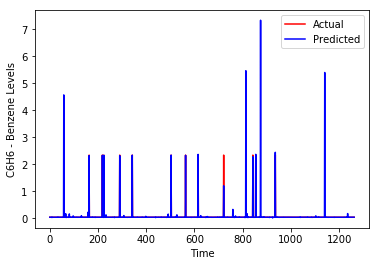

In [35]:
# plot the data on plot graphs

plt.plot(np.arange(Y_test.shape[0]),(Y_test * X_std[3]) + X_mean[3], color='r', label='Actual')
plt.plot(np.arange(y_test_.shape[0]),(y_test_ * X_std[3]) + X_mean[3], color='b', label='Predicted')
plt.xlabel("Time")
plt.ylabel("C6H6 - Benzene Levels")
plt.legend(loc='best')
plt.show()